In [182]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
!pip install hvplot

In [183]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

market_data_df

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [184]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [185]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler().fit_transform(market_data_df)

In [186]:
from sklearn.preprocessing import StandardScaler
# Import the required libraries
# Create an instance of the StandardScaler
#scaler = StandardScaler()

# Scale the market_data_df DataFrame
#scaled_data = scaler.fit_transform(market_data_df)

# Create a DataFrame with the scaled data
market_data_scaled = pd.DataFrame(scaled_data, columns=market_data_df.columns)

# Copy the crypto names from the original data
market_data_scaled["coin_id"] = market_data_df.index

# Set the coinid column as index
market_data_scaled = market_data_scaled.set_index("coin_id")

# Display sample data
market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [187]:
elbow_data = {
    "k": [1, 2, 3, 4, 5],  # List of values for k
    "inertia": [10, 8, 6, 4, 2]  # Corresponding inertia values
}

In [188]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k_values = list(range(1, 12))


# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(market_data_df)
    inertia.append(kmeans.inertia_)



# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": [k_values],  # replace with your actual K values
    "inertia": [inertia]  # replace with your actual inertia values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": np.array(k_values), "inertia": np.around(np.array(inertia), 2)}
elbow_data_df = pd.DataFrame(elbow_data)
# Display the DataFrame
elbow_data_df

,k,inertia
0,1,69983541.80
1,2,8193203.59
2,3,2792810.71
3,4,835227.44
4,5,437329.53
5,6,272156.47
6,7,217043.20
7,8,192025.29
8,9,118743.88
9,10,111181.58


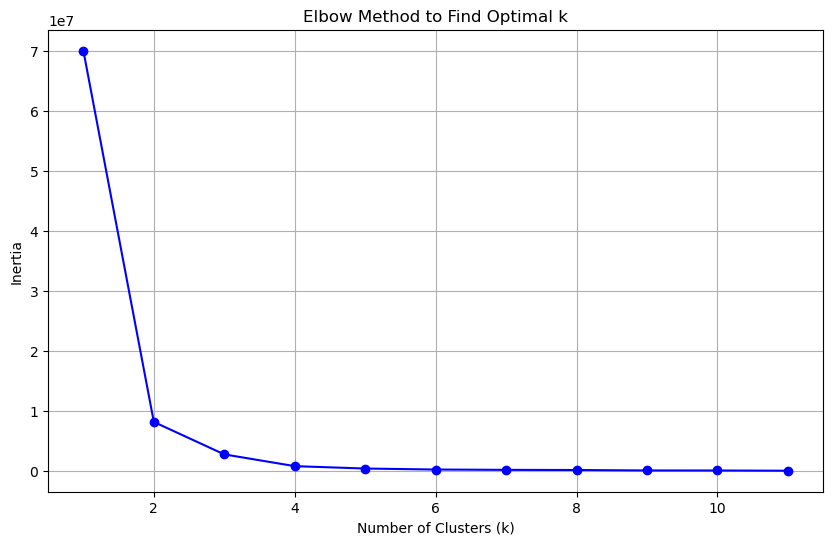

In [189]:

# Plot a line chart with all the inertia values computed with the different values of k
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', color='b', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** By the graph, it seems that the best number of clusters is 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [190]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=1)


In [191]:
# Fit the K-Means model using the scaled data
kmeans.fit(market_data_scaled)


KMeans(n_clusters=4, random_state=1)

In [192]:
# Predict the clusters using the scaled data
clusters = kmeans.predict(market_data_scaled)

# Print the resulting array of cluster values
print(clusters)

#clusters_df = pd.DataFrame(clusters, columns=["cluster"], index=market_data_scaled.index)
#clusters_df.head()



[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 3 2 0 0 1
 0 0 0 0]


In [193]:
# Create a copy of the DataFrame
market_data_scaled_copy = clusters.copy()
market_data_scaled_copy

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 1, 0, 0, 0, 0],
      dtype=int32)

In [194]:
# Add a new column to the DataFrame with the predicted clusters
# Add a new column to the DataFrame with the predicted clusters

# Add a new column to the DataFrame with the predicted clusters
market_data_scaled["clusters"] = clusters



# Display sample data
market_data_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


/opt/anaconda3/envs/ai_dev/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

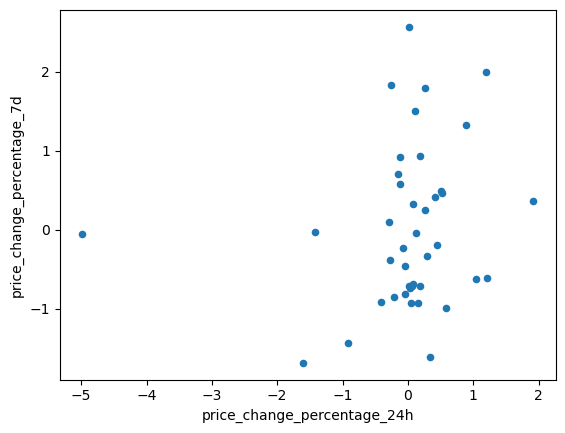

In [195]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
# Create a scatter plot using Pandas plot


clusters_plot = market_data_scaled.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    column = "predicted_clusters",
    colormap='rainbow')
clusters_plot

### Optimize Clusters with Principal Component Analysis.

In [196]:
# Create a PCA model instance and set `n_components=3`
pca = PCA(n_components=3)


In [197]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(market_data_df)
pca_data

# View the first five rows of the DataFrame. 
pca_data[:5]


array([[-341.80096268,  -51.36677548,   12.52547089],
       [-249.42046633,   24.11754777,  -14.23146597],
       [-402.61472077, -118.71073742,   24.83839662],
       [-406.75243715,  -79.48728629,    1.56633057],
       [-382.42994789, -103.43195906,   16.75307273]])

In [198]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[9.76037313e-01 2.30282949e-02 7.48308214e-04]


In [199]:
sum(explained_variance)

0.9998139161298989

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.9998139161298989


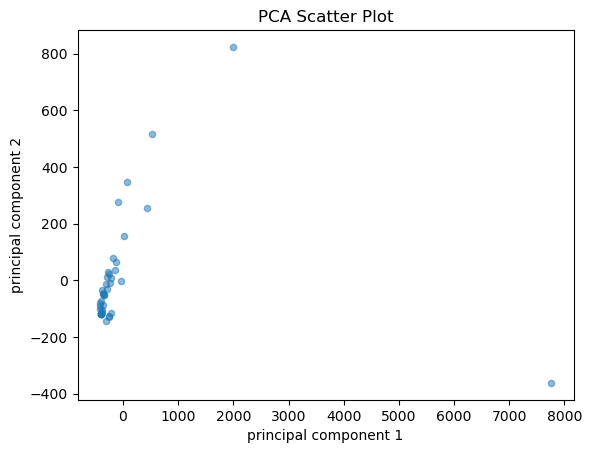

In [200]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you
pca_df = pd.DataFrame( data=pca_data, columns=["principal component 1", "principal component 2", "principal component 3"] )
pca_data[:5]

# Create a scatter plot using Pandas plot by setting
pca_df.plot(kind="scatter", x="principal component 1", y="principal component 2", alpha=0.5) 
plt.title('PCA Scatter Plot') 
plt.show()




In [201]:
market_data_df.index


Index(['bitcoin', 'ethereum', 'tether', 'ripple', 'bitcoin-cash',
       'binancecoin', 'chainlink', 'cardano', 'litecoin', 'bitcoin-cash-sv',
       'crypto-com-chain', 'usd-coin', 'eos', 'monero', 'tron', 'tezos', 'okb',
       'stellar', 'cosmos', 'cdai', 'neo', 'wrapped-bitcoin', 'leo-token',
       'huobi-token', 'nem', 'binance-usd', 'iota', 'vechain', 'zcash',
       'theta-token', 'dash', 'ethereum-classic', 'ethlend', 'maker', 'havven',
       'omisego', 'celsius-degree-token', 'ontology', 'ftx-token', 'true-usd',
       'digibyte'],
      dtype='object', name='coin_id')

### Find the Best Value for k Using the PCA Data

In [202]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))


# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(pca_df)
    inertia.append(kmeans.inertia_)
    

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "k": [k_values],  # replace with your actual K values
    "inertia": [inertia]  # replace with your actual inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_data = {"k": np.array(k_values), "inertia": np.around(np.array(inertia), 2)}
elbow_data_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_data_df




,k,inertia
0,1,69970518.99
1,2,8180192.23
2,3,2580721.08
3,4,823747.13
4,5,426417.53
5,6,261507.90
6,7,219006.47
7,8,165350.55
8,9,124173.94
9,10,102276.88


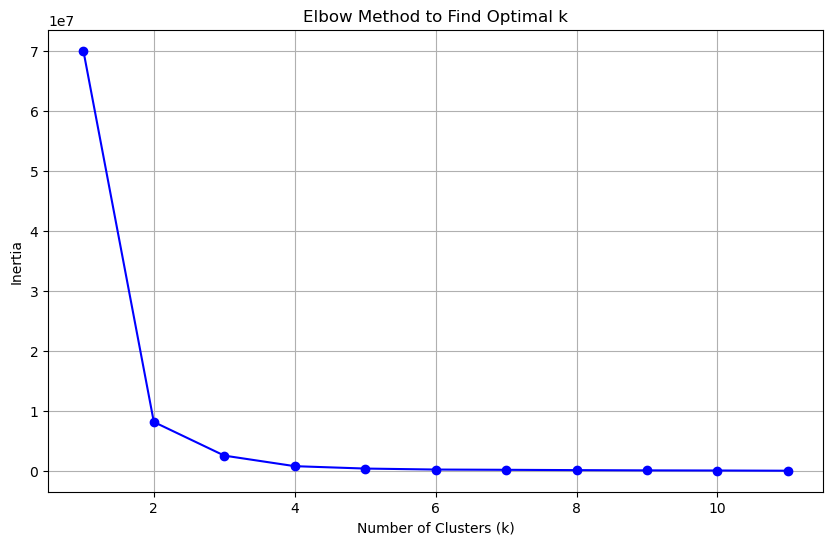

In [203]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', color='b', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 2


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [204]:
# Initialize the K-Means model using the best value for k
pca_kmeans = KMeans(n_clusters=2, n_init='auto', random_state=1)


In [205]:
# Fit the K-Means model using the PCA data
pca_kmeans.fit(pca_df)


KMeans(n_clusters=2, random_state=1)

In [206]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = pca_kmeans.predict(pca_df)


# Print the resulting array of cluster values.
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int32)

In [207]:
# Create a copy of the DataFrame with the PCA data
pca_df_copy = pca_df.copy()


# Add a new column to the DataFrame with the predicted clusters
pca_df_copy["predicted_clusters"] = clusters

# Display sample data
pca_df_copy.head()



,principal component 1,principal component 2,principal component 3,predicted_clusters
0,-341.800963,-51.366775,12.525471,0
1,-249.420466,24.117548,-14.231466,0
2,-402.614721,-118.710737,24.838397,0
3,-406.752437,-79.487286,1.566331,0
4,-382.429948,-103.431959,16.753073,0


In [208]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
pca_df_copy.hvplot.scatter(x="principal component 1", y="principal component 2")

# Create a scatter plot using hvPlot



:Scatter   [principal component 1]   (principal component 2)

### Determine the Weights of Each Feature on each Principal Component

In [223]:
market_data_scaled.columns[:-1]

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [225]:
components_weights_df = pd.DataFrame(pca.components_.T)
components_weights_df

,0,1,2
0,-0.001521,0.003933,0.013938
1,-0.000197,-0.001289,-0.016462
2,-0.000705,0.006577,0.126844
3,0.000955,0.087961,0.377659
4,0.008795,0.158367,0.899181
5,0.300266,0.937599,-0.173684
6,0.953813,-0.296700,0.046120


In [227]:
# Use the columns from the original scaled DataFrame as the index.
components_weights_df.set_index(market_data_scaled.columns[:-1], inplace=True)
components_weights_df

,0,1,2
price_change_percentage_24h,-0.001521,0.003933,0.013938
price_change_percentage_7d,-0.000197,-0.001289,-0.016462
price_change_percentage_14d,-0.000705,0.006577,0.126844
price_change_percentage_30d,0.000955,0.087961,0.377659
price_change_percentage_60d,0.008795,0.158367,0.899181
price_change_percentage_200d,0.300266,0.937599,-0.173684
price_change_percentage_1y,0.953813,-0.296700,0.046120


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** price_change_percentage_1y
    